# Projet IA -- clustering

In [111]:
from __future__ import division
import matplotlib.pyplot as plt
import pandas as pds
import seaborn as sns
import numpy as np
import random
from sklearn.cluster import KMeans
from sklearn import metrics
from IPython.core.display import Image, display
from scipy import stats
%matplotlib inline
np.random.seed(10)
random.seed(10)
from mpl_toolkits.mplot3d import Axes3D
from sklearn import preprocessing # to scale data

## Data import

In [84]:
df = pds.read_csv('./Data2/Data2.txt', sep="\t") # load a pandas dataframe from csv

df.head()
#df.tail()

,Time,Time Code,Country Name,Country Code,Children out of school,CO2 emissions (kt),Non-renewable lectricity production (% of total),Renewable electricity production excluding hydroelectric (% of total),Life expectancy (years),Population,Rural population,Urban population,Surface area (sq. km)
0,2013,YR2013,Afghanistan,AFG,NaN,10014.577,NaN,NaN,62.494,31731688.0,23997724.0,7733964.0,652860.0
1,2013,YR2013,Albania,ALB,10957.0,5064.127,0.00000,0.0,77.702,2895092.0,1291587.0,1603505.0,28750.0
2,2013,YR2013,Algeria,DZA,NaN,134465.223,99.44899,0.0,75.418,38338562.0,11664124.0,26674438.0,2381740.0
3,2013,YR2013,American Samoa,ASM,NaN,NaN,NaN,NaN,NaN,55307.0,6997.0,48310.0,200.0
4,2013,YR2013,Andorra,AND,NaN,476.710,NaN,NaN,NaN,80788.0,9261.0,71527.0,470.0


# Data description

Les données rassemblent trois grands types de variables : <br>
- Des données environnementales (Ex  : production de polluants, production d'énergies verte ...)
- Des données sociologiques (Ex : Accès à l'éducation , Violoences faites aux femmes ...)
- Des données démographiques fondamentales (Ex : Espérance de vie , Population totale ...)

## Description des variables

* Colonne n°1 : Time => Année de l'étude
* Colonne n°2 : Time code
* Colonne n°3 : Contry name => pays étudiés
* Colonne n°4 : Country code


* Colonne n°5 : Annual freshwater withdrawals, total (billion cubic meters) <br>
    Quantité total d'eau douce consonmmée en millions de mètre cube. Cette métrique comprend l'ensemble des utilisations dues à des activités domestiques, industrielles où agricole. Elle soustrait les perte dues à l'évaporation. Enfin elle comprend l'eau produite par désalinisation. 

* Colonne n°6 : Children out of school, primary <br>
Nombre d'enfants de l'âge de l'école du primaire non scolarisés

![Title](Children_Out_of_primary_school.png "Nombre d'enfants  (en million )d'âge du primaire non scolarisés entre 1970 et 2017")

* Colonne n°7 : CO2 emissions (kt) <br>
Emissin en CO2 en kilotonnes

![Title](EmissionCO22014.png)
*Rmq : On pourrait considérer cette variable en fonction du nombre total d'habitant par pays?*

* Colonne n°8 : Electricity production from oil, gas and coal sources (% of total) <br>
Pourcentage d'électricité produite via des ressources fossiles par rapport à la production totale d'électricité (données mondiales 2015)

![Title](Electricite_fossile2015.png)


* Colonne n°9 : Electricity production from renewable sources, excluding hydroelectric (% of total)
![Title](Electricite_verte_sauf_hydro_2015.png)

*Rmq : étonnante répartion, la production d'électricité verte ne semble pas liée au PIB (à démontrer)?*

* Colonne n°9 : Life expectancy at birth, total (years) 

* Colonne n°10 : PM2.5 air pollution, mean annual exposure (micrograms per cubic meter) <br>
**Definition**: Population-weighted exposure to ambient PM2.5 pollution is defined as the average level of exposure of a nation's population to concentrations of suspended particles measuring less than 2.5 microns in aerodynamic diameter, which are capable of penetrating deep into the respiratory tract and causing severe health damage. Exposure is calculated by weighting mean annual concentrations of PM2.5 by population in both urban and rural areas.
https://www.indexmundi.com/facts/indicators/EN.ATM.PM25.MC.M3
![Title](P.M.252016png.png)

*Rmq :Comment démontrer que la vie est injuste Rapport entre taux d'émisson et les Pm2.5 par pays *

* Colonne n°10 : Population, total 
* Colonne n°11 : Surface area (sq. km) 
* Colonne n°12 : Total greenhouse gas emissions (kt of CO2 equivalent) 
*Rmq : Cette dernière variable est peut etre redondante avec le taux d'émission de CO2*
* Colonne n°13 : Urban population 
![Title](Poppulation_Urbaine_1960_2017.png)

*Rmq : quelle horrible exponentielle !*

* Colonne n°14 : Women who believe a husband is justified in beating his wife when she refuses sex with him (%) 

*rmq : Je pense qu il faudrait inclure le PIB meme si ce nest pas un indice par excellence. Ceci permettrait
    de creer des variables derivees comme le taux demisssion de poluants en fct de la ichesse produite, ou encore
    la production denergie verte par rapport au PiB (sur ceci on pourrait avoir des resultats surprenants).*

## Data cleaning

## Rename columns

In [85]:
df  = df.rename(index=str, columns={"Children out of school":"School", "CO2 emissions (kt)": "CO2" , "Non-renewable lectricity production (% of total)":"Fossile_electricity", "Renewable electricity production excluding hydroelectric (% of total)" : "Renewable_electricity", "Life expectancy (years)":"Life_expectancy" , "Rural population":"Rural" , "Urban population" : "Urban" ,"Surface area (sq. km)" : "Surface" } )

In [86]:
df.head()

,Time,Time Code,Country Name,Country Code,School,CO2,Fossile_electricity,Renewable_electricity,Life_expectancy,Population,Rural,Urban,Surface
0,2013,YR2013,Afghanistan,AFG,NaN,10014.577,NaN,NaN,62.494,31731688.0,23997724.0,7733964.0,652860.0
1,2013,YR2013,Albania,ALB,10957.0,5064.127,0.00000,0.0,77.702,2895092.0,1291587.0,1603505.0,28750.0
2,2013,YR2013,Algeria,DZA,NaN,134465.223,99.44899,0.0,75.418,38338562.0,11664124.0,26674438.0,2381740.0
3,2013,YR2013,American Samoa,ASM,NaN,NaN,NaN,NaN,NaN,55307.0,6997.0,48310.0,200.0
4,2013,YR2013,Andorra,AND,NaN,476.710,NaN,NaN,NaN,80788.0,9261.0,71527.0,470.0


### Column cleaning

In [87]:
df.count() # Compte les non NaN par colonne

Time                     217
Time Code                217
Country Name             217
Country Code             217
School                   125
CO2                      206
Fossile_electricity      142
Renewable_electricity    141
Life_expectancy          199
Population               216
Rural                    214
Urban                    214
Surface                  217
dtype: int64

##### Les colonnes suivantes sont à supprimer (trop de NaN) : 
##### Annual freshwater, Total greenhouse gas emission, Women who believe...

# Row cleaning 

In [88]:
filtered_df = df.dropna() # On enlève toutes les lignes qui contiennent des NA
# On pourra éventuellement faire un filtre différent selon les attributs conservés dans l'analyse finale

filtered_df.tail()

,Time,Time Code,Country Name,Country Code,School,CO2,Fossile_electricity,Renewable_electricity,Life_expectancy,Population,Rural,Urban,Surface
210,2013,YR2013,"Venezuela, RB",VEN,244940.0,183922.052,32.165476,0.000000,74.035,30317848.0,3597819.0,26720029.0,912050.0
211,2013,YR2013,Vietnam,VNM,127071.0,147230.050,58.337998,0.115950,75.663,91497725.0,61825928.0,29671797.0,330972.0
214,2013,YR2013,"Yemen, Rep.",YEM,599564.0,25496.651,100.000000,0.000000,64.291,25576322.0,16993164.0,8583158.0,527970.0
215,2013,YR2013,Zambia,ZMB,363385.0,3956.693,0.142857,0.000000,59.982,15153210.0,8960851.0,6192359.0,752610.0
216,2013,YR2013,Zimbabwe,ZWE,398579.0,11675.728,46.060606,1.734587,58.053,15054506.0,10138608.0,4915898.0,390760.0


## K-means

### Premier cas simple pour bien comprendre

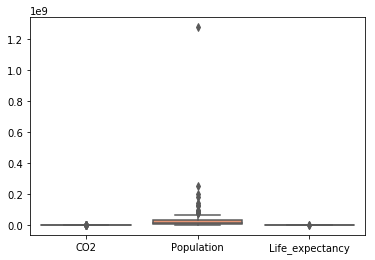

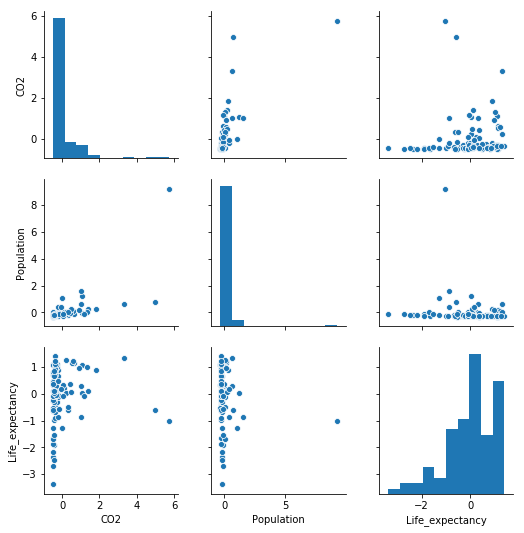

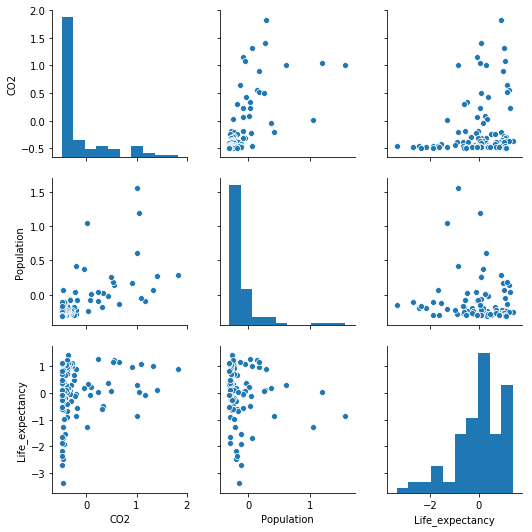

In [141]:
DF_kmeans1 = filtered_df[['CO2'  , 'Population' , 'Life_expectancy']] 
#DF_kmeans1.values = preprocessing.normalize(DF_kmeans1)
sns.boxplot(data=DF_kmeans1, orient="v", palette="Set2")
DF_kmeans1 =  ( DF_kmeans1 - DF_kmeans1.mean() )/ DF_kmeans1.std()


dfScatterPlot = sns.pairplot(data=DF_kmeans1)

DF_kmeans1 = DF_kmeans1.sort_values(by =['CO2'] , ascending = False)[3: ][ : ] # Remove Outliers
dfScatterPlot = sns.pairplot(data=DF_kmeans1)
# Bi plot

In [144]:
km1 = KMeans(n_clusters=3) # create a KMeans object
km1.fit(DF_kmeans1)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

Text(0.5,0,'Life_expectancy')

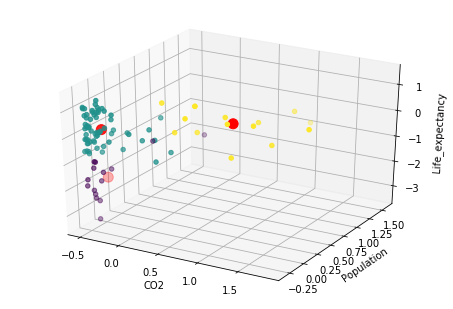

In [143]:
# 3D plot using pyplot
fig = plt.figure() #opens a figure environment
ax = Axes3D(fig) #to perform a 3D plot
x=DF_kmeans1.loc[:,'CO2']
y=DF_kmeans1.loc[:,'Population']
z=DF_kmeans1.loc[:,'Life_expectancy']
ax.scatter(x, y, z,c=km1.labels_.astype(np.float)) #plot definition and options 
ax.scatter(km1.cluster_centers_[:,0],km1.cluster_centers_[:,1],km1.cluster_centers_[:,2],c='r',s=100) #plot definition and options 
# We set the colors to be in function of the labels of each cluster, ie each category
# Cluster centers are in red
ax.set_xlabel('CO2')
ax.set_ylabel('Population')
ax.set_zlabel('Life_expectancy')

On remarque que l'espérance de vie n'est pas caractéristique d'un groupe. Cependant la population et le CO2 semble corrélé nous allons le vérifier dans Kmean2.

# Kmeans 2


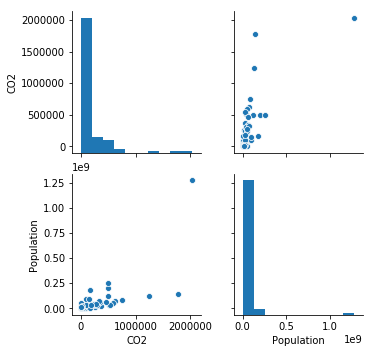

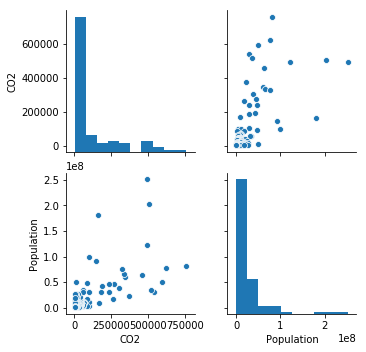

In [145]:
DF_kmeans2 = filtered_df[['CO2'  , 'Population' ]] 
dfScatterPlot = sns.pairplot(data=DF_kmeans2)

DF_kmeans2 = DF_kmeans2.sort_values(by =['CO2'] , ascending = False)[3: ][ : ] # Remove Outliers
dfScatterPlot = sns.pairplot(data=DF_kmeans2)

In [146]:
km2 = KMeans(n_clusters=3) # create a KMeans object
km2.fit(DF_kmeans2)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

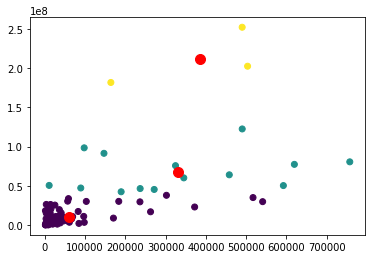

In [124]:
plt.scatter(data=DF_kmeans2, x="CO2", y="Population" , c=km2.labels_.astype(np.float))
plt.scatter(km2.cluster_centers_[:,0],km2.cluster_centers_[:,1],c='red',s=100)


On observe d'après ce graphique les limites du Kmeans 

### Vision d'ensemble des données

## DBSCAN